<a href="https://colab.research.google.com/github/AtharvaSC03/ML-Projects/blob/main/CROP_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
url = 'https://www.kaggle.com/datasets/atharvaingle/crop-recommendation-dataset'

# Step 1: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Dataset

In [ ]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


# Step 3: Exploratory Data Analysis

In [ ]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

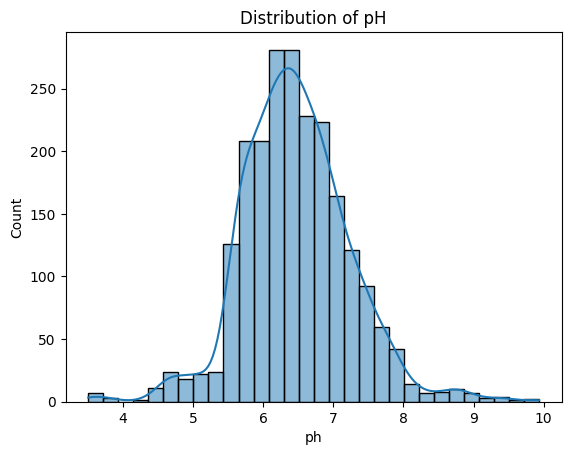

In [ ]:
# Distribution of pH
sns.histplot(df['ph'], kde = True, bins = 30)
plt.title('Distribution of pH')
plt.show()

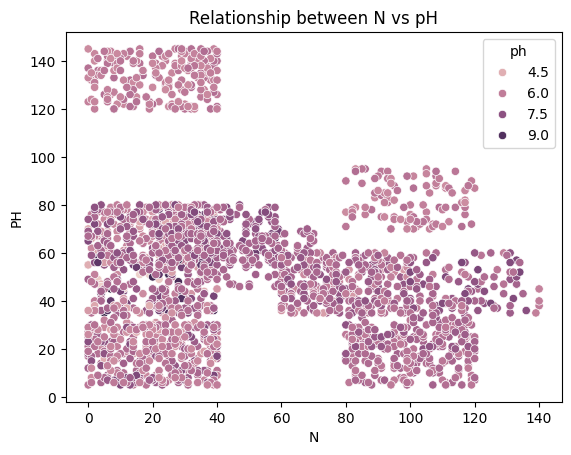

In [ ]:
# Relationship between N, P, K and pH
sns.scatterplot(x = 'N', y = 'P', data = df, hue = 'ph')
plt.xlabel('N')
plt.ylabel('PH')
plt.title('Relationship between N vs pH')
plt.show()

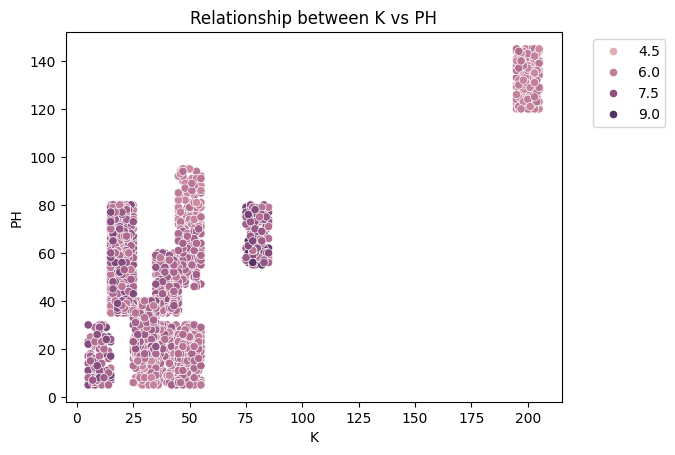

In [ ]:
sns.scatterplot(x = 'K', y = 'P', data = df, hue = 'ph')
plt.xlabel('K')
plt.ylabel('PH')
plt.title('Relationship between K vs PH')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Text(0.5, 1.0, 'Relationship between K vs PH')

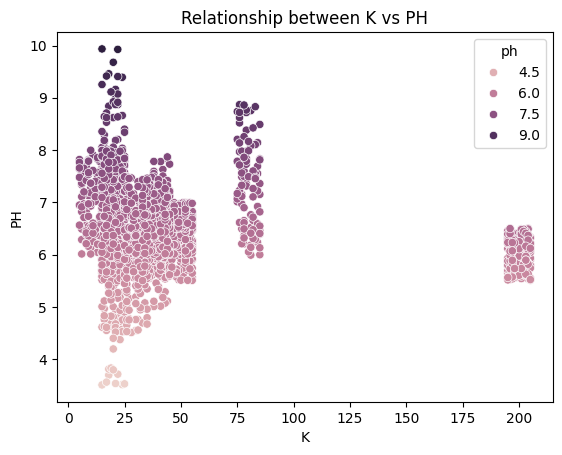

In [ ]:
sns.scatterplot(x = 'K', y = 'ph', data = df, hue = 'ph')
plt.xlabel('K')
plt.ylabel('PH')
plt.title('Relationship between K vs PH')

Text(0.5, 1.0, 'Relationship between N vs K')

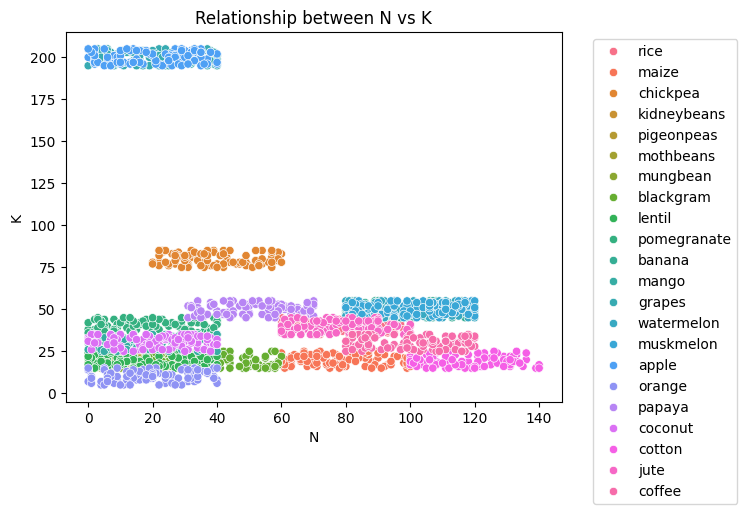

In [ ]:
sns.scatterplot(x = 'N', y = 'K', data = df, hue = 'label')
plt.xlabel('N')
plt.ylabel('K')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Relationship between N vs K')

In [ ]:
df1 = df.copy()
df1.drop('label', axis = 1, inplace = True)

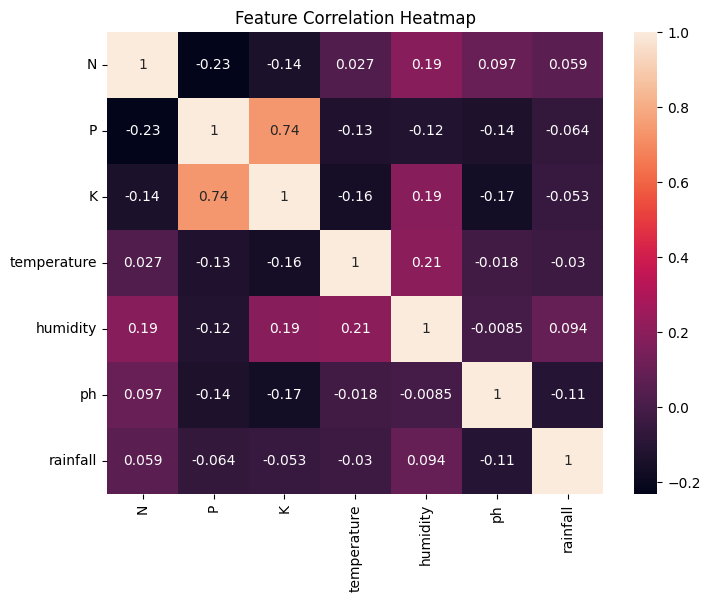

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# Step 4: Modeling

In [ ]:
X = df[["N", "P", "K"]]
y = df["ph"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
# Random Forest
rf = RandomForestRegressor(n_estimators=500, max_depth=15,random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=500, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

In [ ]:
# Metrics
print("Linear Regression R²:", r2_score(y_test, y_pred))
print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Linear Regression R²: 0.01297346717754333
Random Forest R²: 0.028122037659594534
Linear Regression RMSE: 0.7703198091967378
Random Forest RMSE: 0.7643856400440888


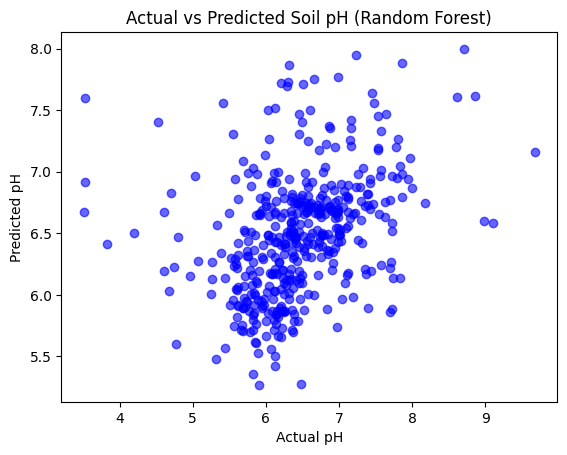

In [ ]:
plt.scatter(y_test, y_pred_rf, alpha=0.6, color="blue")
plt.xlabel("Actual pH")
plt.ylabel("Predicted pH")
plt.title("Actual vs Predicted Soil pH (Random Forest)")
plt.show()

<Axes: xlabel='ph'>

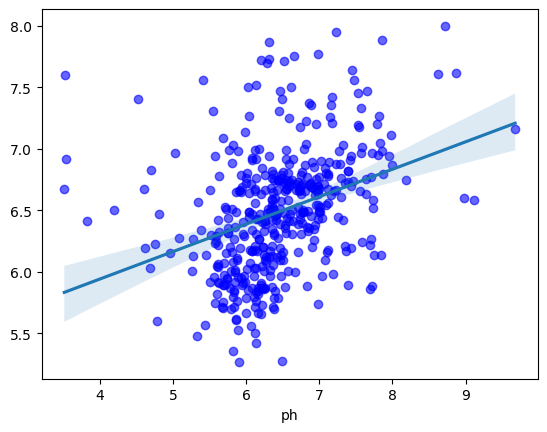

In [ ]:
sns.regplot(x=y_test, y=y_pred_rf, scatter_kws={'alpha':0.6, 'color':'blue'})

In [ ]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
# ---------------- XGBoost ----------------
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))

XGBoost R²: -0.033935927214605366
XGBoost RMSE: 0.7884124354368683


In [ ]:
# %pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.2 MB/s eta 0:00:00


In [ ]:
# ---------------- LightGBM ----------------
lgb_model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, max_depth=-1, random_state=42)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
print("LightGBM R²:", r2_score(y_test, y_pred_lgb))
print("LightGBM RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lgb)))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 318
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 3
[LightGBM] [Info] Start training from score 6.475940
LightGBM R²: -0.025175938832725953
LightGBM RMSE: 0.7850654317044234


In [ ]:

# ---------------- CatBoost ----------------
cat_model = CatBoostRegressor(iterations=500, learning_rate=0.05, depth=6, random_seed=42, verbose=0)
cat_model.fit(X_train, y_train)
y_pred_cat = cat_model.predict(X_test)
print("CatBoost R²:", r2_score(y_test, y_pred_cat))
print("CatBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_cat)))

CatBoost R²: 0.11687601525561653
CatBoost RMSE: 0.7286475222204771
